In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout, Rescaling, Conv2D, MaxPooling2D, InputLayer
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = "C:/Users/maxis/Desktop/Proseminar - CNN/archive/Train"
im_size = (32, 32)

train = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    image_size=im_size,
    validation_split=0.2,
    seed=123,
    subset="training",
    batch_size=64
)
val = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    image_size=im_size,
    validation_split=0.2,
    seed=123,
    subset="validation",
    batch_size=64
)

classes = train.class_names
print(len(classes))

Found 39209 files belonging to 43 classes.
Using 31368 files for training.
Found 39209 files belonging to 43 classes.
Using 7841 files for validation.
43


In [4]:
model = Sequential([
    InputLayer((32, 32, 3)),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(classes), activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          3

In [7]:
model.fit(train, validation_data=val, epochs=10)

Epoch 1/10
491/491 [==============================] - 6s 12ms/step - loss: 0.0507 - accuracy: 0.9861 - val_loss: 0.1055 - val_accuracy: 0.9723
Epoch 2/10
491/491 [==============================] - 6s 12ms/step - loss: 0.0418 - accuracy: 0.9881 - val_loss: 0.0689 - val_accuracy: 0.9829
Epoch 3/10
491/491 [==============================] - 6s 12ms/step - loss: 0.0308 - accuracy: 0.9910 - val_loss: 0.0607 - val_accuracy: 0.9857
Epoch 4/10
491/491 [==============================] - 6s 12ms/step - loss: 0.0289 - accuracy: 0.9915 - val_loss: 0.0751 - val_accuracy: 0.9824
Epoch 5/10
491/491 [==============================] - 6s 12ms/step - loss: 0.0239 - accuracy: 0.9926 - val_loss: 0.0590 - val_accuracy: 0.9870
Epoch 6/10
491/491 [==============================] - 6s 12ms/step - loss: 0.0135 - accuracy: 0.9962 - val_loss: 0.0644 - val_accuracy: 0.9867
Epoch 7/10
491/491 [==============================] - 6s 12ms/step - loss: 0.0197 - accuracy: 0.9938 - val_loss: 0.0523 - val_accuracy: 0.9903

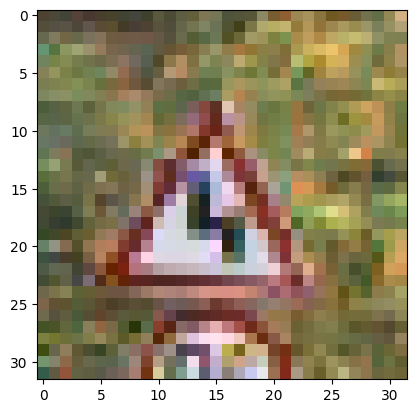

1/1 [==============================] - 0s 12ms/step
Double curve


In [21]:
img = tf.keras.preprocessing.image.load_img("C:/Users/maxis/Desktop/Proseminar - CNN/archive/Test/00016.png", target_size=(32,32))
plt.imshow(img)
plt.show()

img = tf.keras.preprocessing.image.img_to_array(img)
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)
print(classes[np.argmax(prediction)])



In [22]:
model.save("traffic_signs_99_Accuracy")

INFO:tensorflow:Assets written to: traffic_signs_99_Accuracy\assets


INFO:tensorflow:Assets written to: traffic_signs_99_Accuracy\assets
